In [104]:
from vars import *
%matplotlib inline
#
warnings.simplefilter(action='ignore', category=FutureWarning)


In [105]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

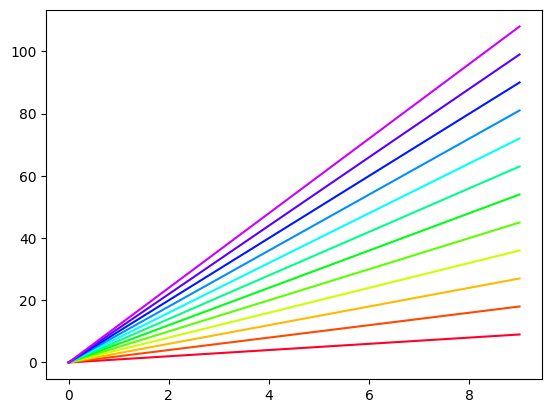

In [106]:
NUM_COLORS = 12

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    ax.plot(np.arange(10)*(i+1))

fig.savefig('moreColors.png')
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]) 

## BER
### QPSK


In [107]:
# QPSK
data_qpsk = pd.read_csv('results/BER_QPSK.csv')

In [108]:
bers_label = ['BER_R_perfect', 'BER_R_cubic', 'BER_R_fft', 'BER_D_perfect', 'BER_D_cubic', 'BER_D_fft']
bers_axis = ['Rayleigh Perfect', 'Rayleigh Cubic', 'Rayleigh FFT', 'Multipath Perfect', 'Multipath Cubic', 'Multipath FFT']

PATHS         = [5, 40]
PILOT_SPACING = [5, 10, 20]
SPEED         = [30, 120]
CARRIER_FREQ  = [738, 35e8]

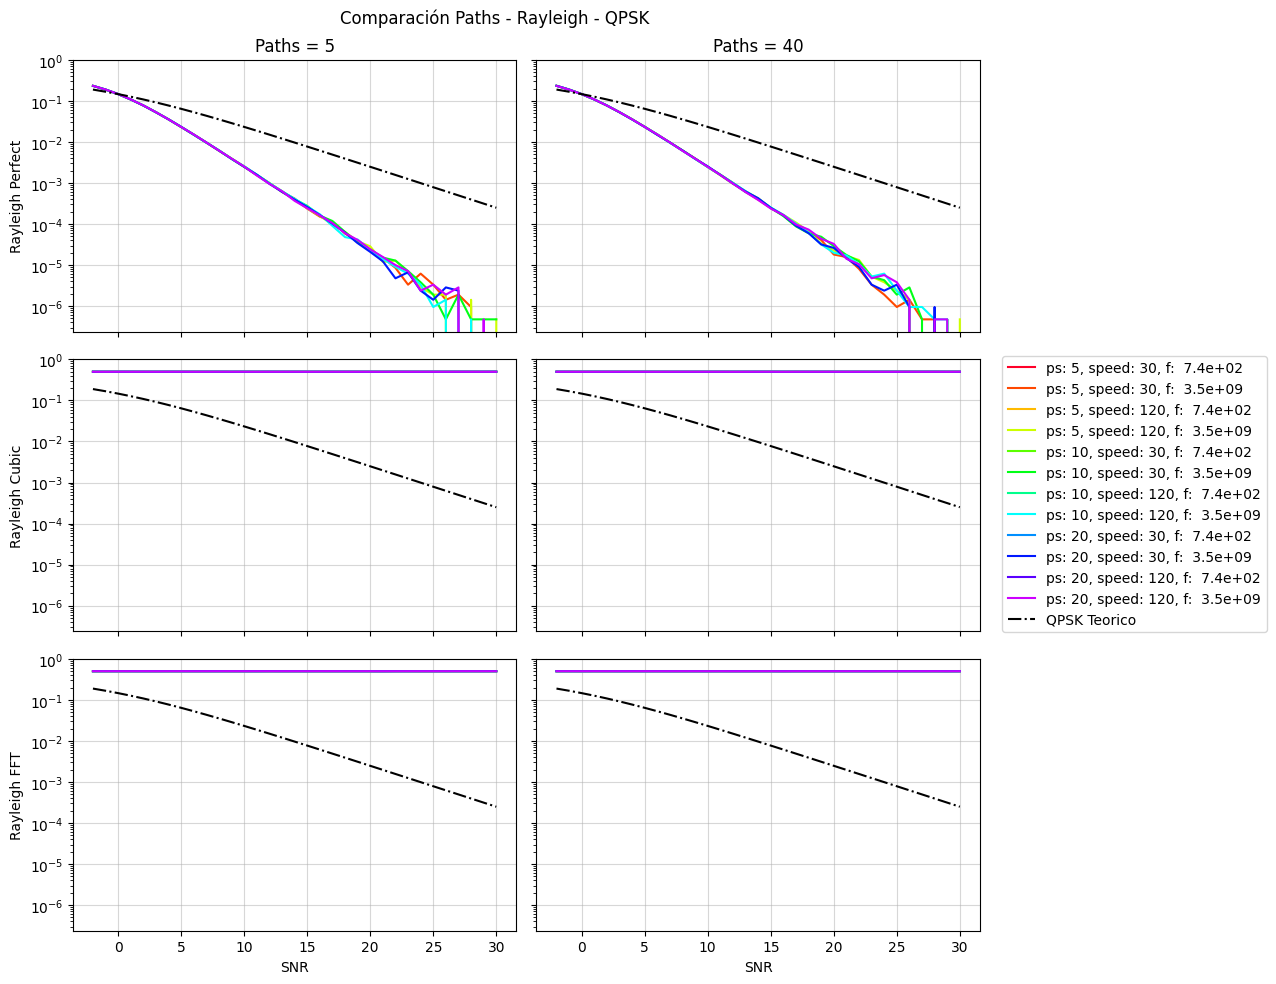

In [109]:
# paths rayleigh
path_5  = data_qpsk[data_qpsk['path'] == 5]
path_40 = data_qpsk[data_qpsk['path'] == 40]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                path_5_filtered = path_5[(path_5['pilot_spacing'] == pilot_spacing) & (path_5['speed'] == speed) & (path_5['carrier_freq'] == carrier_freq)]
                path_40_filtered = path_40[(path_40['pilot_spacing'] == pilot_spacing) & (path_40['speed'] == speed) & (path_40['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(path_5_filtered['snr'], path_5_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')
                ax[i][1].plot(path_40_filtered['snr'], path_40_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/4)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Paths = 5")
ax[0][1].set_title("Paths = 40")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Paths - Rayleigh - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_rayleigh_path.png', bbox_inches='tight')

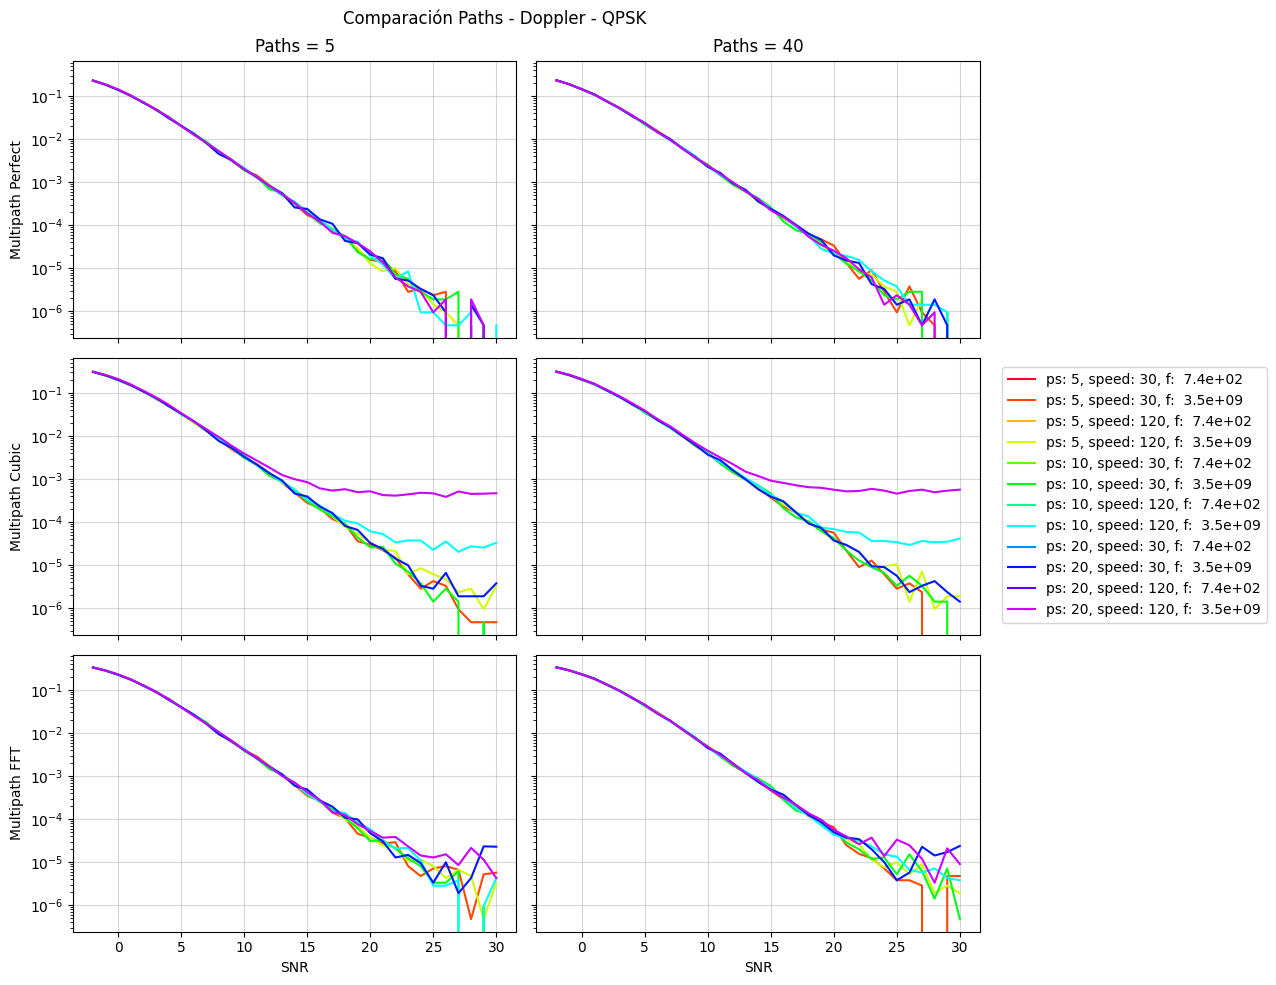

In [110]:
# paths doppler
path_5  = data_qpsk[data_qpsk['path'] == 5]
path_40 = data_qpsk[data_qpsk['path'] == 40]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                path_5_filtered = path_5[(path_5['pilot_spacing'] == pilot_spacing) & (path_5['speed'] == speed) & (path_5['carrier_freq'] == carrier_freq)]
                path_40_filtered = path_40[(path_40['pilot_spacing'] == pilot_spacing) & (path_40['speed'] == speed) & (path_40['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(path_5_filtered['snr'], path_5_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')
                ax[i][1].plot(path_40_filtered['snr'], path_40_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Paths = 5")
ax[0][1].set_title("Paths = 40")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Paths - Doppler - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_doppler_path.png', bbox_inches='tight')

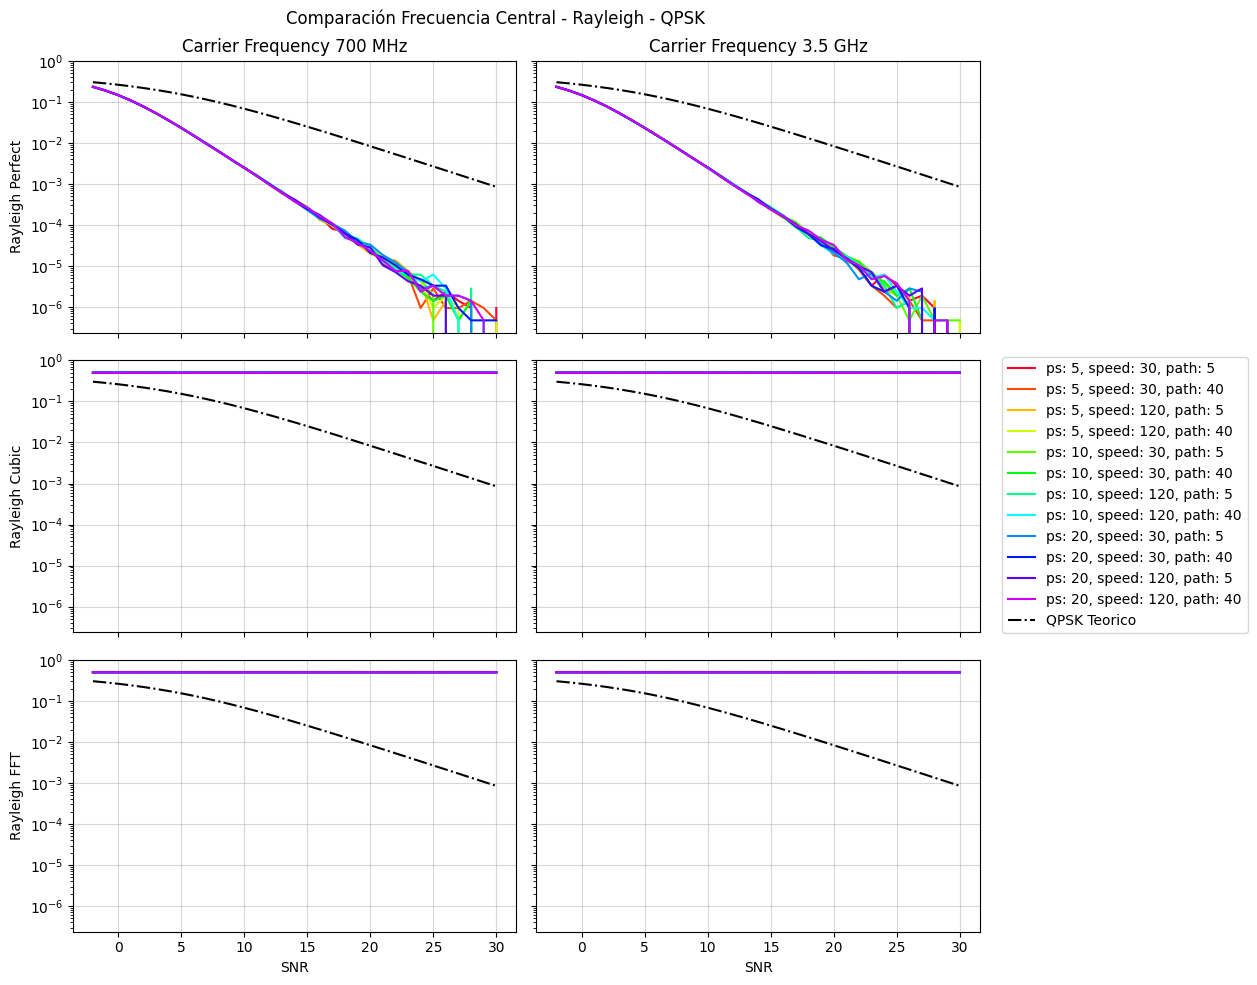

In [111]:
# carrier_freq rayleigh
cf_7  = data_qpsk[data_qpsk['carrier_freq'] == 7e8]
cf_35 = data_qpsk[data_qpsk['carrier_freq'] == 35e8]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for path in PATHS:
            for i in range(0, 3):
                ber = bers_label[i]
                cf_7_filtered = cf_7[(cf_7['pilot_spacing'] == pilot_spacing) & (cf_7['speed'] == speed) & (cf_7['path'] == path)]
                cf_35_filtered = cf_35[(cf_35['pilot_spacing'] == pilot_spacing) & (cf_35['speed'] == speed) & (cf_35['path'] == path)]
                ax[i][0].plot(cf_7_filtered['snr'], cf_7_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')
                ax[i][1].plot(cf_35_filtered['snr'], cf_35_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Carrier Frequency 700 MHz")
ax[0][1].set_title("Carrier Frequency 3.5 GHz")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Frecuencia Central - Rayleigh - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_rayleigh_cf.png', bbox_inches='tight')

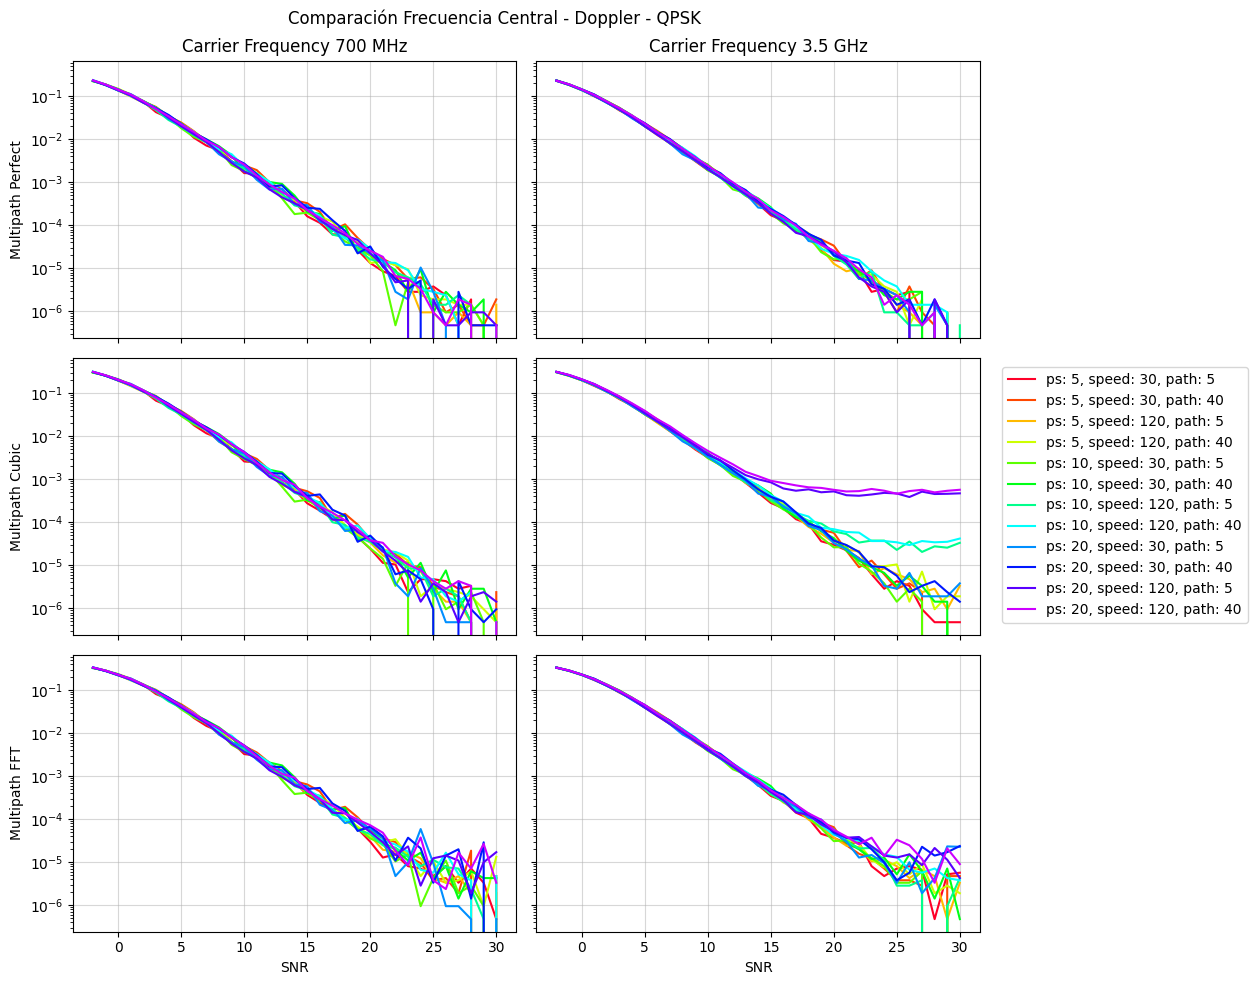

In [112]:
# carrier_freq doppler
cf_7  = data_qpsk[data_qpsk['carrier_freq'] == 7e8]
cf_35 = data_qpsk[data_qpsk['carrier_freq'] == 35e8]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for path in PATHS:
            for i in range(0, 3):
                ber = bers_label[i+3]
                cf_7_filtered = cf_7[(cf_7['pilot_spacing'] == pilot_spacing) & (cf_7['speed'] == speed) & (cf_7['path'] == path)]
                cf_35_filtered = cf_35[(cf_35['pilot_spacing'] == pilot_spacing) & (cf_35['speed'] == speed) & (cf_35['path'] == path)]
                ax[i][0].plot(cf_7_filtered['snr'], cf_7_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')
                ax[i][1].plot(cf_35_filtered['snr'], cf_35_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Carrier Frequency 700 MHz")
ax[0][1].set_title("Carrier Frequency 3.5 GHz")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Frecuencia Central - Doppler - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_doppler_cf.png', bbox_inches='tight')

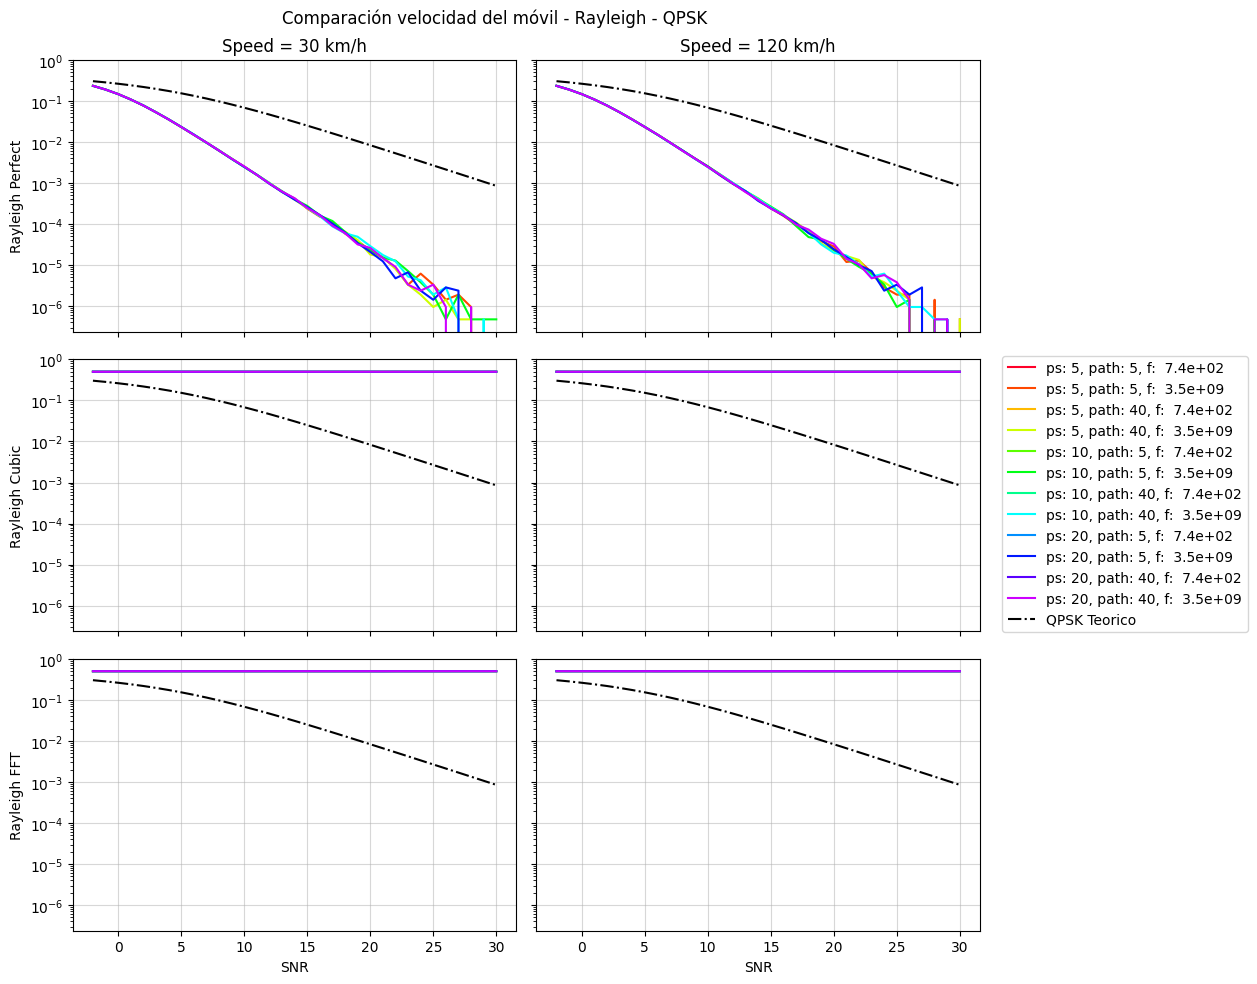

In [113]:
# speed rayleigh
speed_30  = data_qpsk[data_qpsk['speed'] == 30]
speed_120 = data_qpsk[data_qpsk['speed'] == 120]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                speed_30_filtered = speed_30[(speed_30['pilot_spacing'] == pilot_spacing) & (speed_30['path'] == path) & (speed_30['carrier_freq'] == carrier_freq)]
                speed_120_filtered = speed_120[(speed_120['pilot_spacing'] == pilot_spacing) & (speed_120['path'] == path) & (speed_120['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(speed_30_filtered['snr'], speed_30_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(speed_120_filtered['snr'], speed_120_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Speed = 30 km/h")
ax[0][1].set_title("Speed = 120 km/h")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación velocidad del móvil - Rayleigh - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_rayleigh_speed.png', bbox_inches='tight')

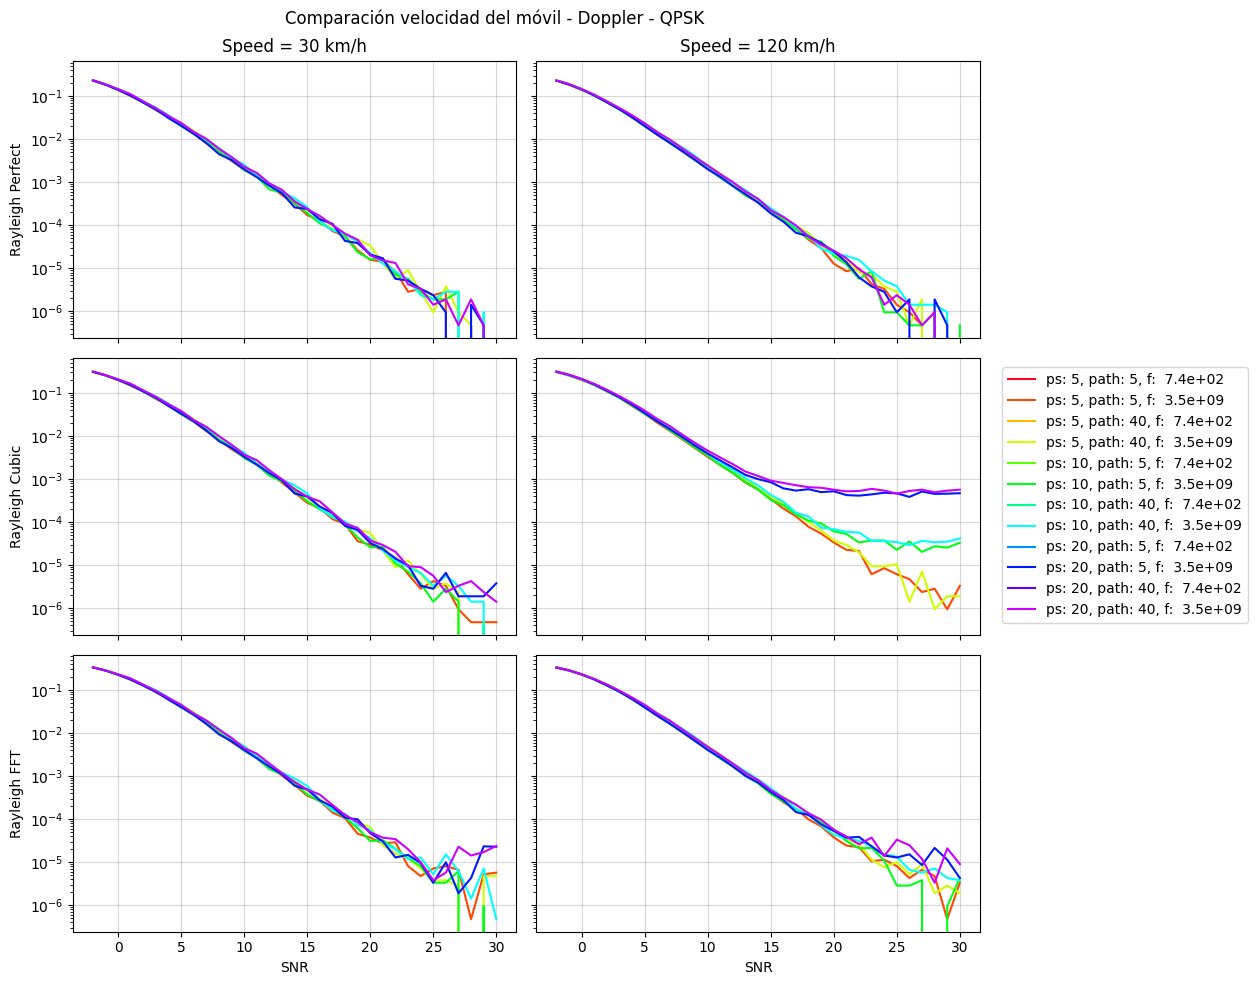

In [114]:
# speed doppler
speed_30  = data_qpsk[data_qpsk['speed'] == 30]
speed_120 = data_qpsk[data_qpsk['speed'] == 120]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                speed_30_filtered = speed_30[(speed_30['pilot_spacing'] == pilot_spacing) & (speed_30['path'] == path) & (speed_30['carrier_freq'] == carrier_freq)]
                speed_120_filtered = speed_120[(speed_120['pilot_spacing'] == pilot_spacing) & (speed_120['path'] == path) & (speed_120['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(speed_30_filtered['snr'], speed_30_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(speed_120_filtered['snr'], speed_120_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Speed = 30 km/h")
ax[0][1].set_title("Speed = 120 km/h")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación velocidad del móvil - Doppler - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_doppler_speed.png', bbox_inches='tight')

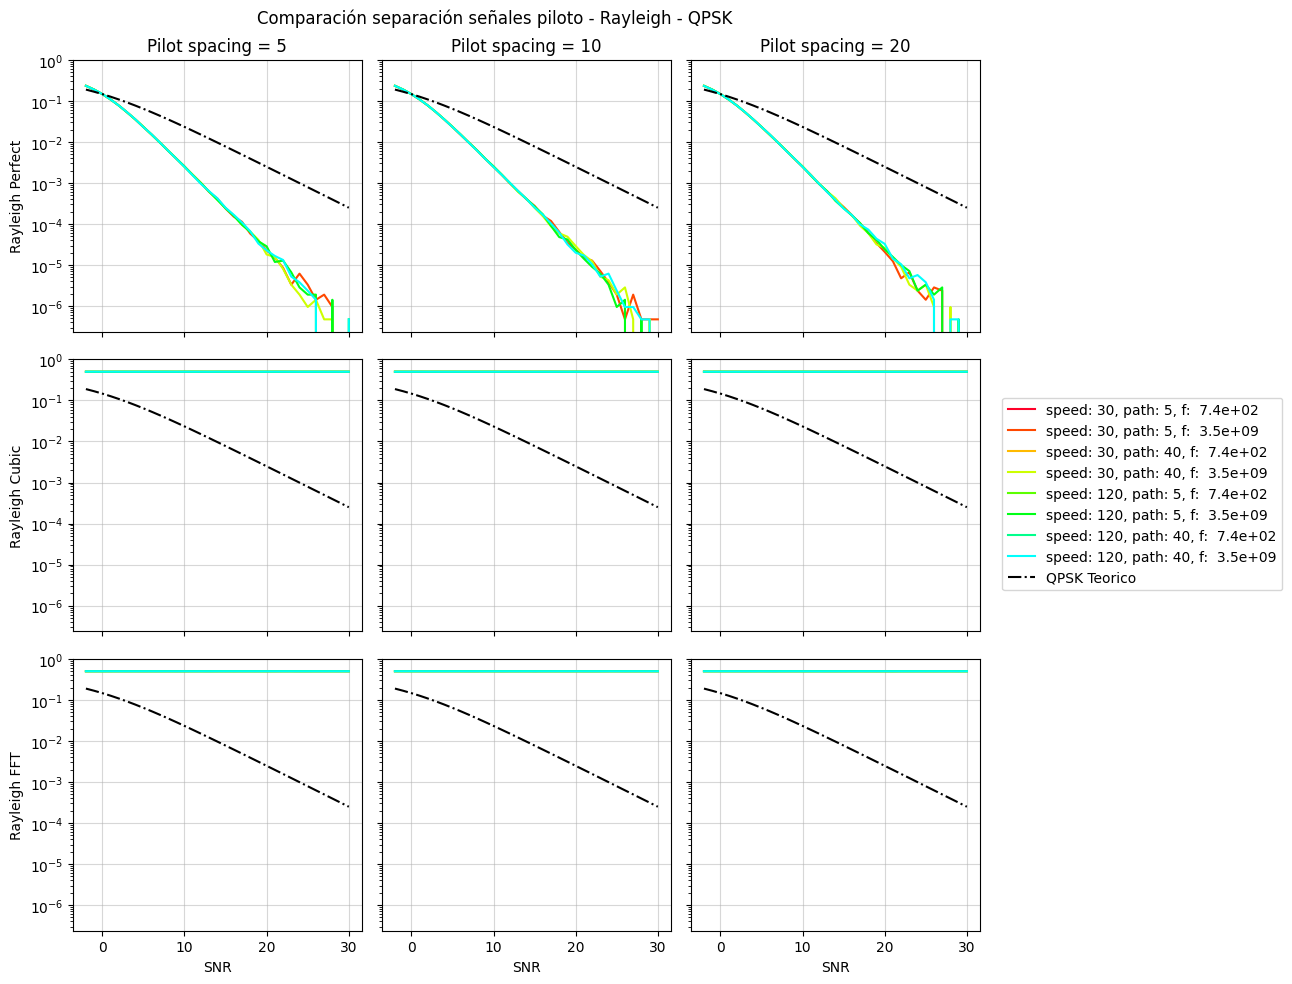

In [115]:
# ps rayleigh
ps_5   = data_qpsk[data_qpsk['pilot_spacing'] == 5]
ps_10  = data_qpsk[data_qpsk['pilot_spacing'] == 10]
ps_20  = data_qpsk[data_qpsk['pilot_spacing'] == 20]

fig, ax = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(10, 10))
for speed in SPEED:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                ps_5_filtered = ps_5[(ps_5['speed'] == speed) & (ps_5['path'] == path) & (ps_5['carrier_freq'] == carrier_freq)]
                ps_10_filtered = ps_10[(ps_10['speed'] == speed) & (ps_10['path'] == path) & (ps_10['carrier_freq'] == carrier_freq)]
                ps_20_filtered = ps_20[(ps_20['speed'] == speed) & (ps_20['path'] == path) & (ps_20['carrier_freq'] == carrier_freq)]
                
                ax[i][0].plot(ps_5_filtered['snr'], ps_5_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(ps_10_filtered['snr'], ps_10_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][2].plot(ps_20_filtered['snr'], ps_20_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/4)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(3):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")
ax[2][2].set_xlabel("SNR")

ax[0][0].set_title("Pilot spacing = 5")
ax[0][1].set_title("Pilot spacing = 10")
ax[0][2].set_title("Pilot spacing = 20")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación separación señales piloto - Rayleigh - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_rayleigh_ps.png', bbox_inches='tight')

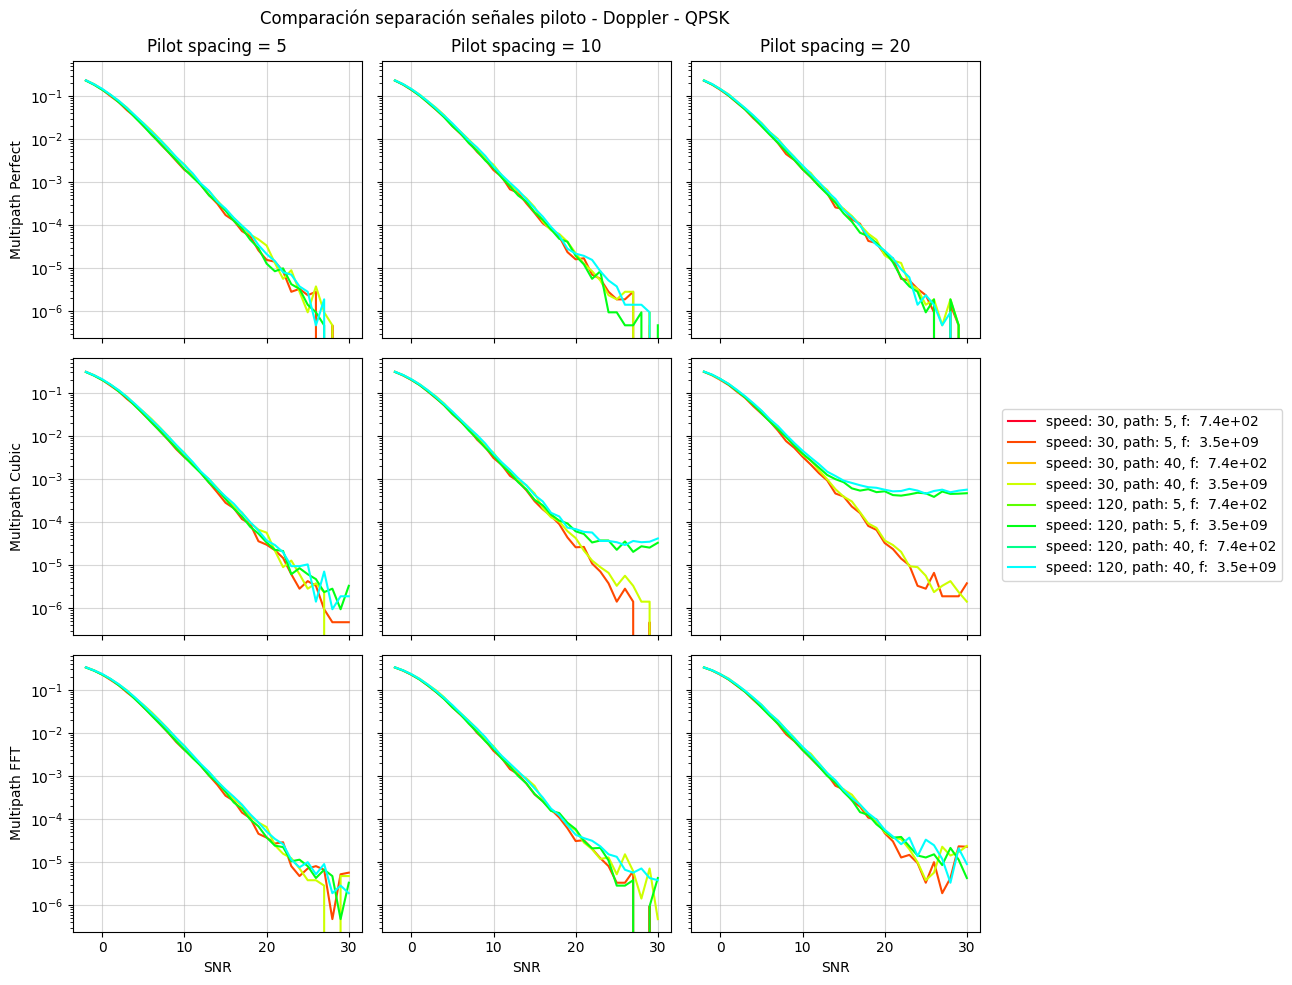

In [116]:
# ps doppler
ps_5   = data_qpsk[data_qpsk['pilot_spacing'] == 5]
ps_10  = data_qpsk[data_qpsk['pilot_spacing'] == 10]
ps_20  = data_qpsk[data_qpsk['pilot_spacing'] == 20]

fig, ax = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(10, 10))
for speed in SPEED:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                ps_5_filtered = ps_5[(ps_5['speed'] == speed) & (ps_5['path'] == path) & (ps_5['carrier_freq'] == carrier_freq)]
                ps_10_filtered = ps_10[(ps_10['speed'] == speed) & (ps_10['path'] == path) & (ps_10['carrier_freq'] == carrier_freq)]
                ps_20_filtered = ps_20[(ps_20['speed'] == speed) & (ps_20['path'] == path) & (ps_20['carrier_freq'] == carrier_freq)]
                
                ax[i][0].plot(ps_5_filtered['snr'], ps_5_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(ps_10_filtered['snr'], ps_10_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][2].plot(ps_20_filtered['snr'], ps_20_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(3):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")
ax[2][2].set_xlabel("SNR")

ax[0][0].set_title("Pilot spacing = 5")
ax[0][1].set_title("Pilot spacing = 10")
ax[0][2].set_title("Pilot spacing = 20")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación separación señales piloto - Doppler - QPSK")
plt.tight_layout()

fig.savefig('results/qpsk_doppler_ps.png', bbox_inches='tight')

### 16QAM

#### Rayleigh


In [117]:
# 16QAM
data_16qam = pd.read_csv('results/BER_16QAM.csv')

In [118]:
data_16qam_path_5  = data_16qam[data_16qam['path'] == 5]
data_16qam_path_40 = data_16qam[data_16qam['path'] == 40]

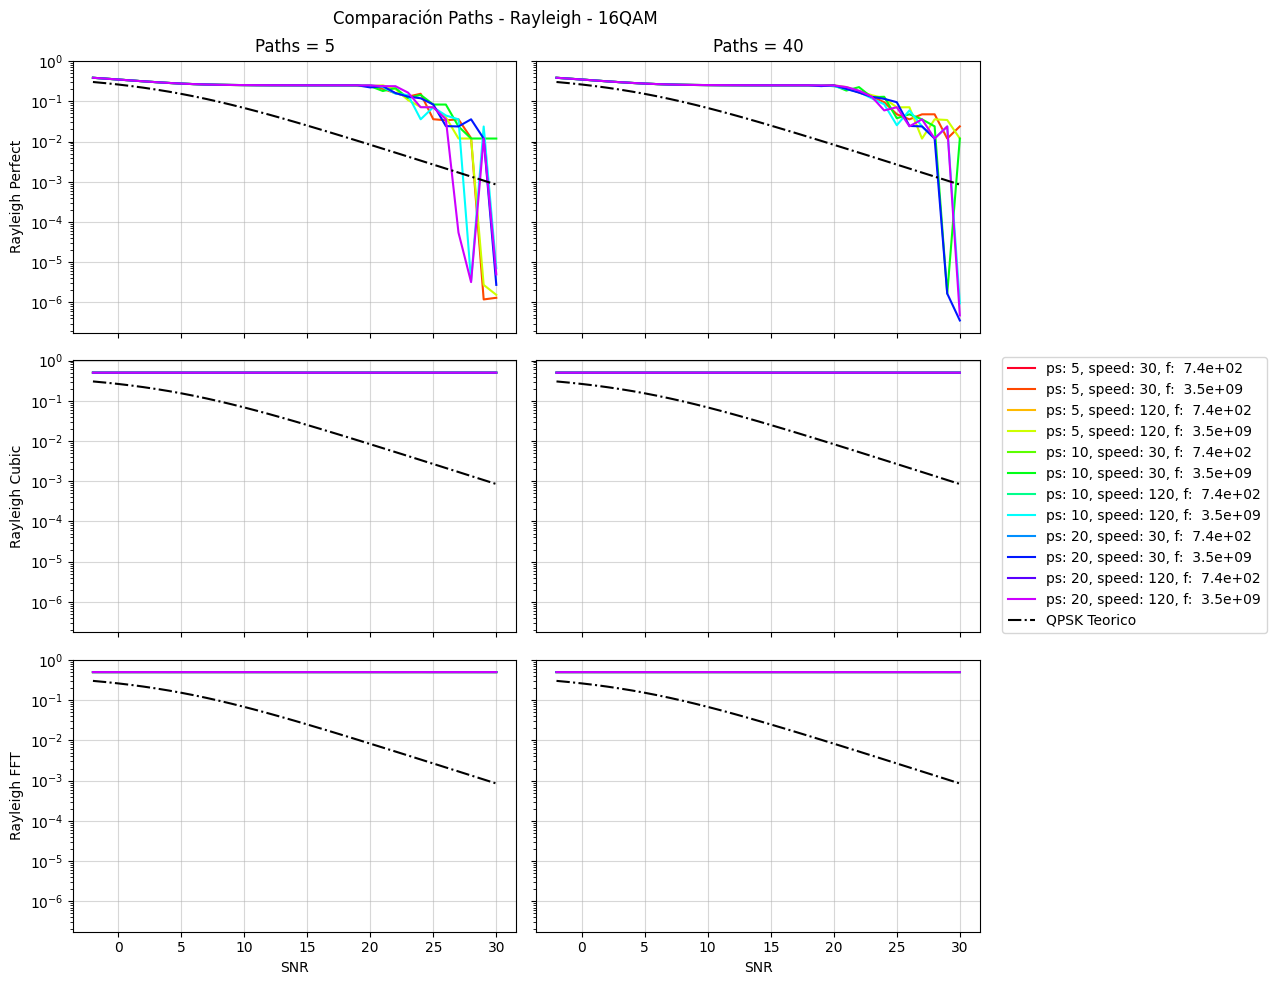

In [119]:
# paths rayleigh
path_5  = data_16qam[data_16qam['path'] == 5]
path_40 = data_16qam[data_16qam['path'] == 40]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                path_5_filtered = path_5[(path_5['pilot_spacing'] == pilot_spacing) & (path_5['speed'] == speed) & (path_5['carrier_freq'] == carrier_freq)]
                path_40_filtered = path_40[(path_40['pilot_spacing'] == pilot_spacing) & (path_40['speed'] == speed) & (path_40['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(path_5_filtered['snr'], path_5_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')
                ax[i][1].plot(path_40_filtered['snr'], path_40_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Paths = 5")
ax[0][1].set_title("Paths = 40")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Paths - Rayleigh - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_rayleigh_path.png', bbox_inches='tight')

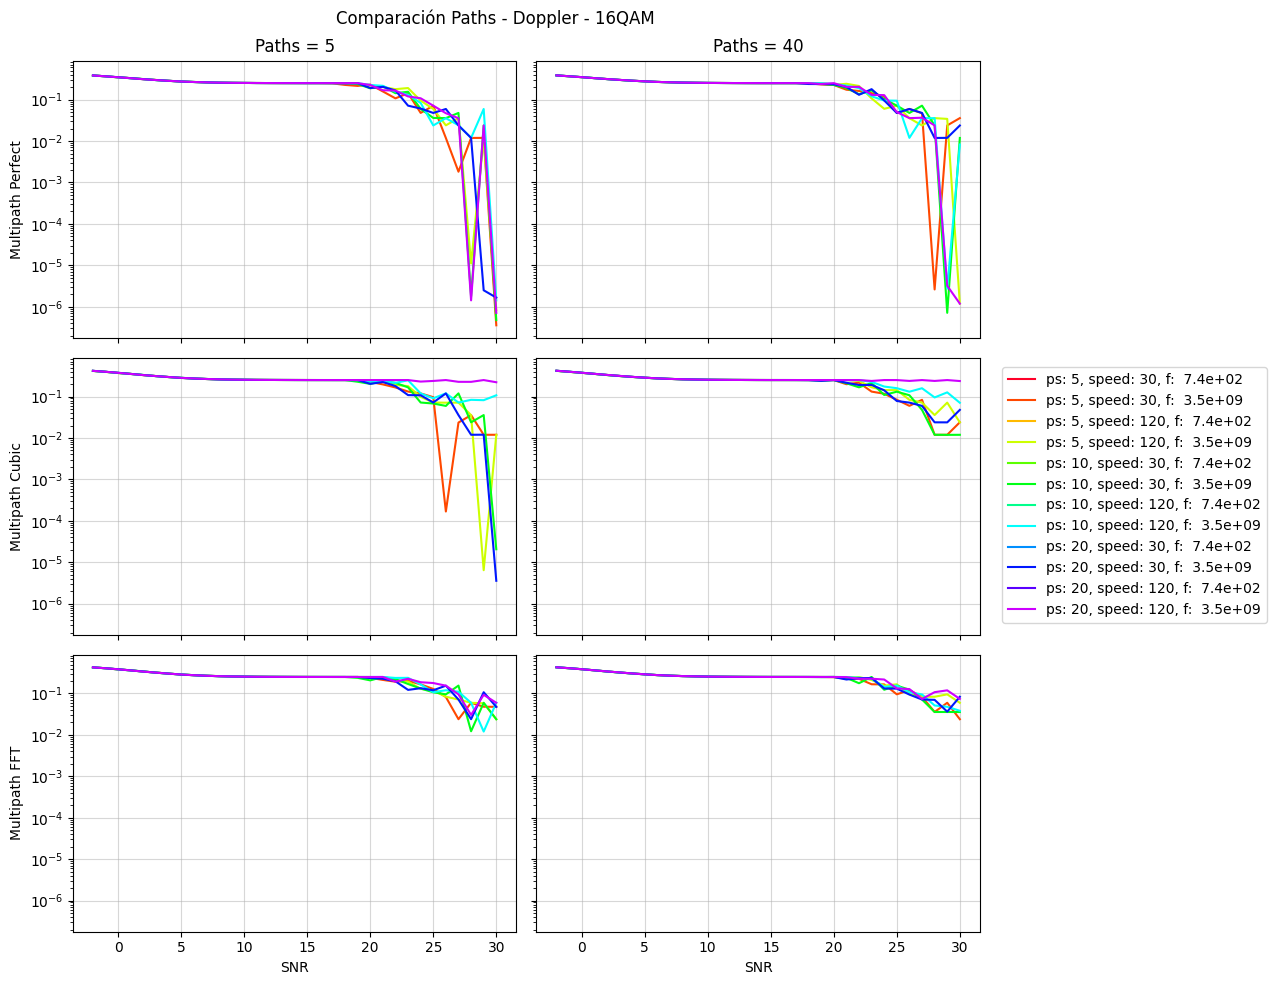

In [120]:
# paths doppler
path_5  = data_16qam[data_16qam['path'] == 5]
path_40 = data_16qam[data_16qam['path'] == 40]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                path_5_filtered = path_5[(path_5['pilot_spacing'] == pilot_spacing) & (path_5['speed'] == speed) & (path_5['carrier_freq'] == carrier_freq)]
                path_40_filtered = path_40[(path_40['pilot_spacing'] == pilot_spacing) & (path_40['speed'] == speed) & (path_40['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(path_5_filtered['snr'], path_5_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')
                ax[i][1].plot(path_40_filtered['snr'], path_40_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Paths = 5")
ax[0][1].set_title("Paths = 40")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Paths - Doppler - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_doppler_path.png', bbox_inches='tight')

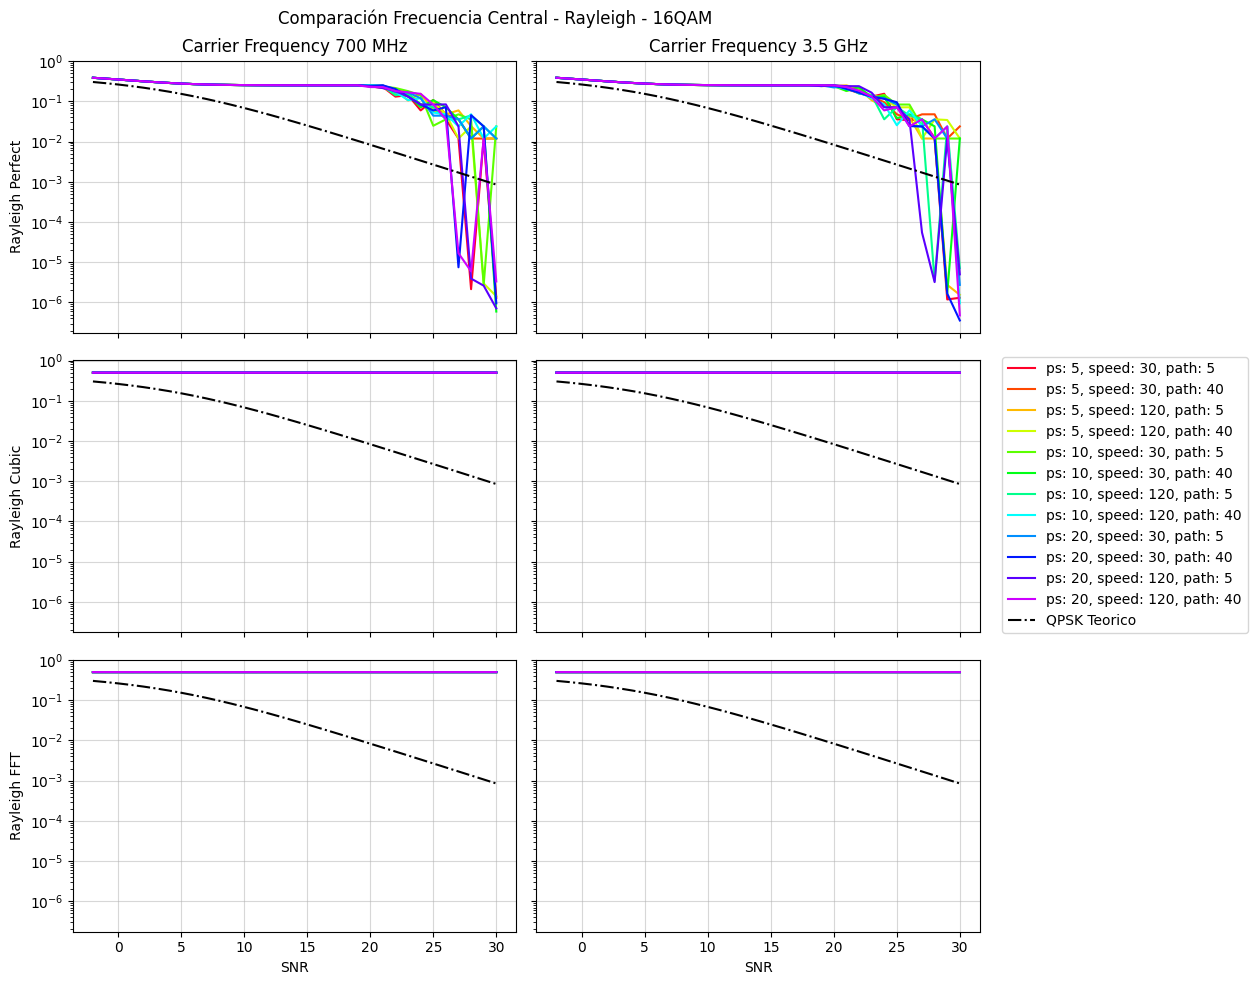

In [121]:
# carrier_freq rayleigh
cf_7  = data_16qam[data_16qam['carrier_freq'] == 7e8]
cf_35 = data_16qam[data_16qam['carrier_freq'] == 35e8]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for path in PATHS:
            for i in range(0, 3):
                ber = bers_label[i]
                cf_7_filtered = cf_7[(cf_7['pilot_spacing'] == pilot_spacing) & (cf_7['speed'] == speed) & (cf_7['path'] == path)]
                cf_35_filtered = cf_35[(cf_35['pilot_spacing'] == pilot_spacing) & (cf_35['speed'] == speed) & (cf_35['path'] == path)]
                ax[i][0].plot(cf_7_filtered['snr'], cf_7_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')
                ax[i][1].plot(cf_35_filtered['snr'], cf_35_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Carrier Frequency 700 MHz")
ax[0][1].set_title("Carrier Frequency 3.5 GHz")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Frecuencia Central - Rayleigh - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_rayleigh_cf.png', bbox_inches='tight')

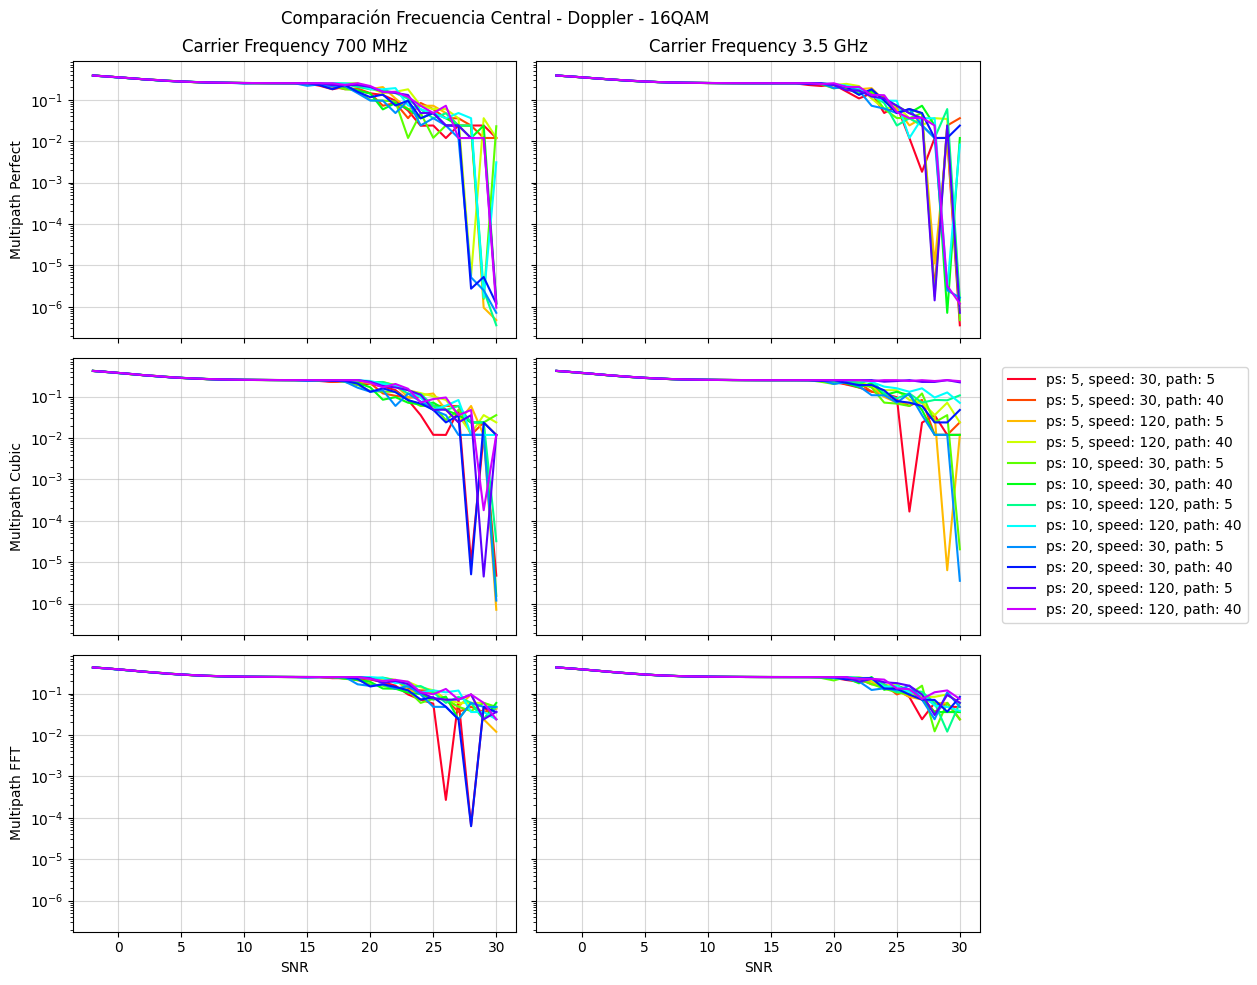

In [122]:
# carrier_freq doppler
cf_7  = data_16qam[data_16qam['carrier_freq'] == 7e8]
cf_35 = data_16qam[data_16qam['carrier_freq'] == 35e8]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for speed in SPEED:
        for path in PATHS:
            for i in range(0, 3):
                ber = bers_label[i+3]
                cf_7_filtered = cf_7[(cf_7['pilot_spacing'] == pilot_spacing) & (cf_7['speed'] == speed) & (cf_7['path'] == path)]
                cf_35_filtered = cf_35[(cf_35['pilot_spacing'] == pilot_spacing) & (cf_35['speed'] == speed) & (cf_35['path'] == path)]
                ax[i][0].plot(cf_7_filtered['snr'], cf_7_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')
                ax[i][1].plot(cf_35_filtered['snr'], cf_35_filtered[ber], '-', label=f'ps: {pilot_spacing}, speed: {speed}, path: {path}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Carrier Frequency 700 MHz")
ax[0][1].set_title("Carrier Frequency 3.5 GHz")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación Frecuencia Central - Doppler - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_doppler_cf.png', bbox_inches='tight')

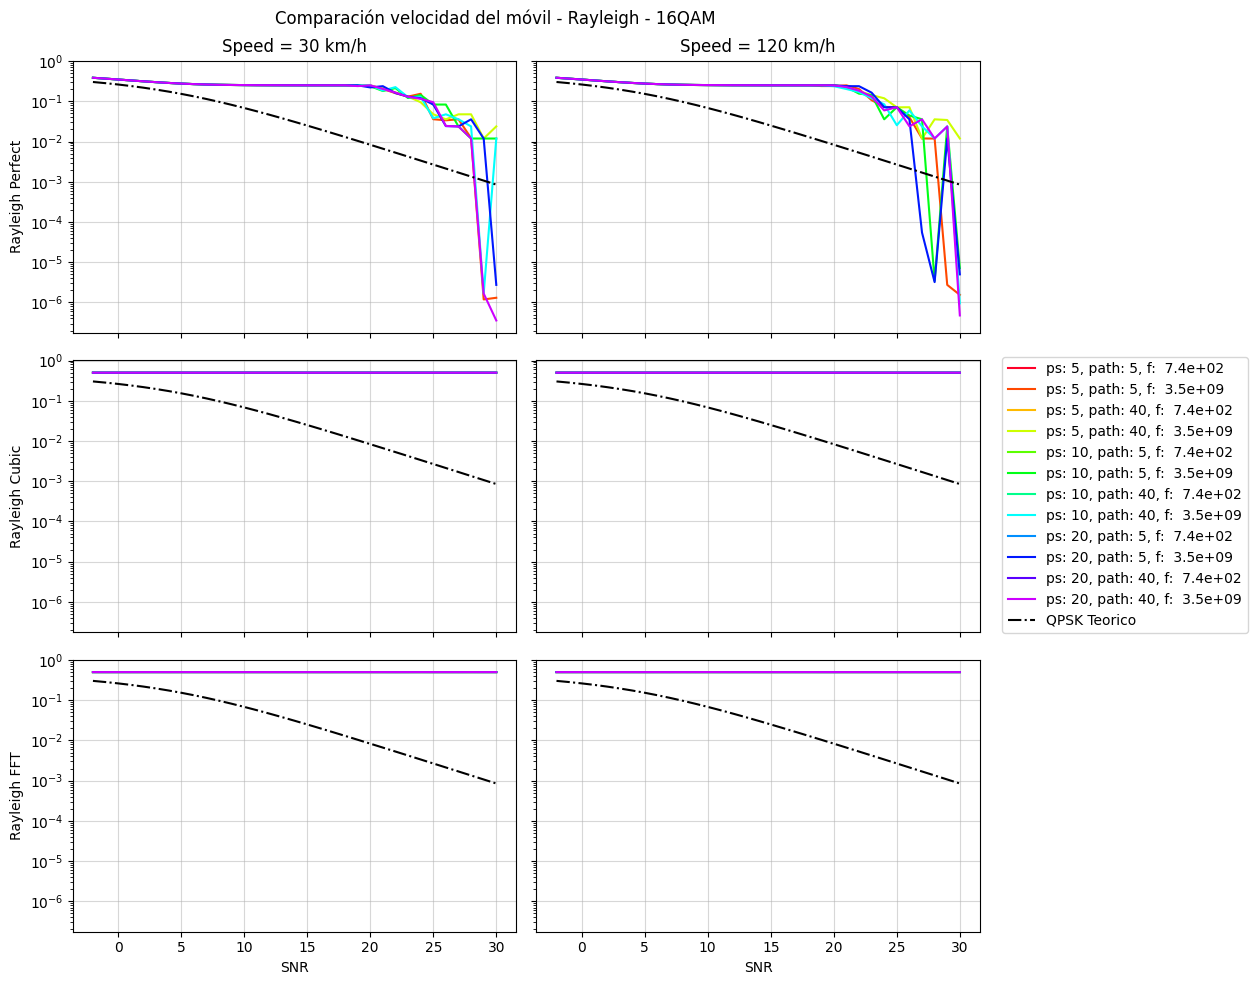

In [123]:
# speed rayleigh
speed_30  = data_16qam[data_16qam['speed'] == 30]
speed_120 = data_16qam[data_16qam['speed'] == 120]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                speed_30_filtered = speed_30[(speed_30['pilot_spacing'] == pilot_spacing) & (speed_30['path'] == path) & (speed_30['carrier_freq'] == carrier_freq)]
                speed_120_filtered = speed_120[(speed_120['pilot_spacing'] == pilot_spacing) & (speed_120['path'] == path) & (speed_120['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(speed_30_filtered['snr'], speed_30_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(speed_120_filtered['snr'], speed_120_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(2):
        ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Speed = 30 km/h")
ax[0][1].set_title("Speed = 120 km/h")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación velocidad del móvil - Rayleigh - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_rayleigh_speed.png', bbox_inches='tight')

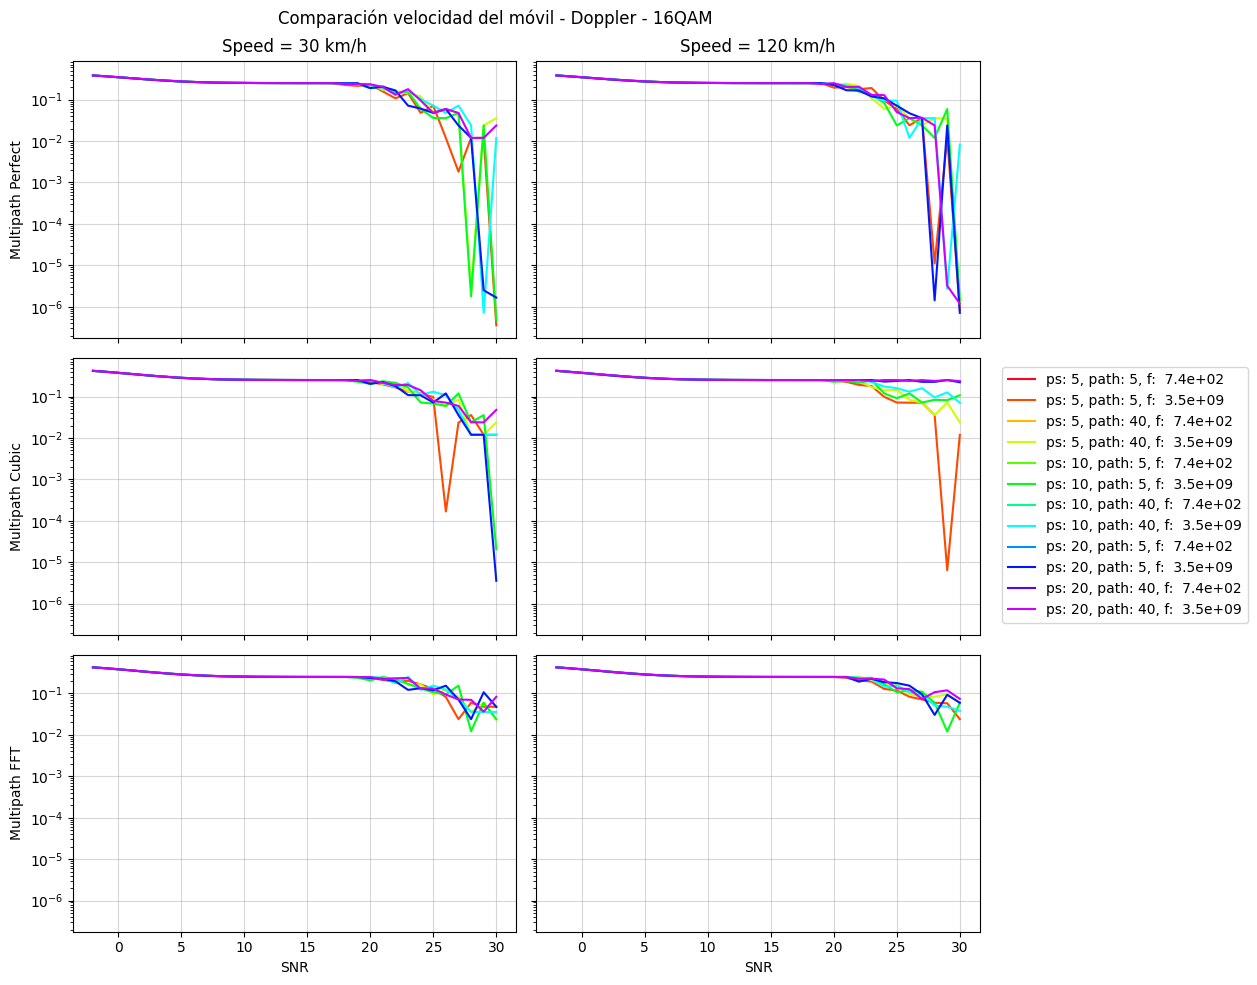

In [124]:
# speed doppler
speed_30  = data_16qam[data_16qam['speed'] == 30]
speed_120 = data_16qam[data_16qam['speed'] == 120]

fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10, 10))
for pilot_spacing in PILOT_SPACING:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                speed_30_filtered = speed_30[(speed_30['pilot_spacing'] == pilot_spacing) & (speed_30['path'] == path) & (speed_30['carrier_freq'] == carrier_freq)]
                speed_120_filtered = speed_120[(speed_120['pilot_spacing'] == pilot_spacing) & (speed_120['path'] == path) & (speed_120['carrier_freq'] == carrier_freq)]
                ax[i][0].plot(speed_30_filtered['snr'], speed_30_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(speed_120_filtered['snr'], speed_120_filtered[ber], '-', label=f'ps: {pilot_spacing}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(2):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")

ax[0][0].set_title("Speed = 30 km/h")
ax[0][1].set_title("Speed = 120 km/h")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación velocidad del móvil - Doppler - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_doppler_speed.png', bbox_inches='tight')

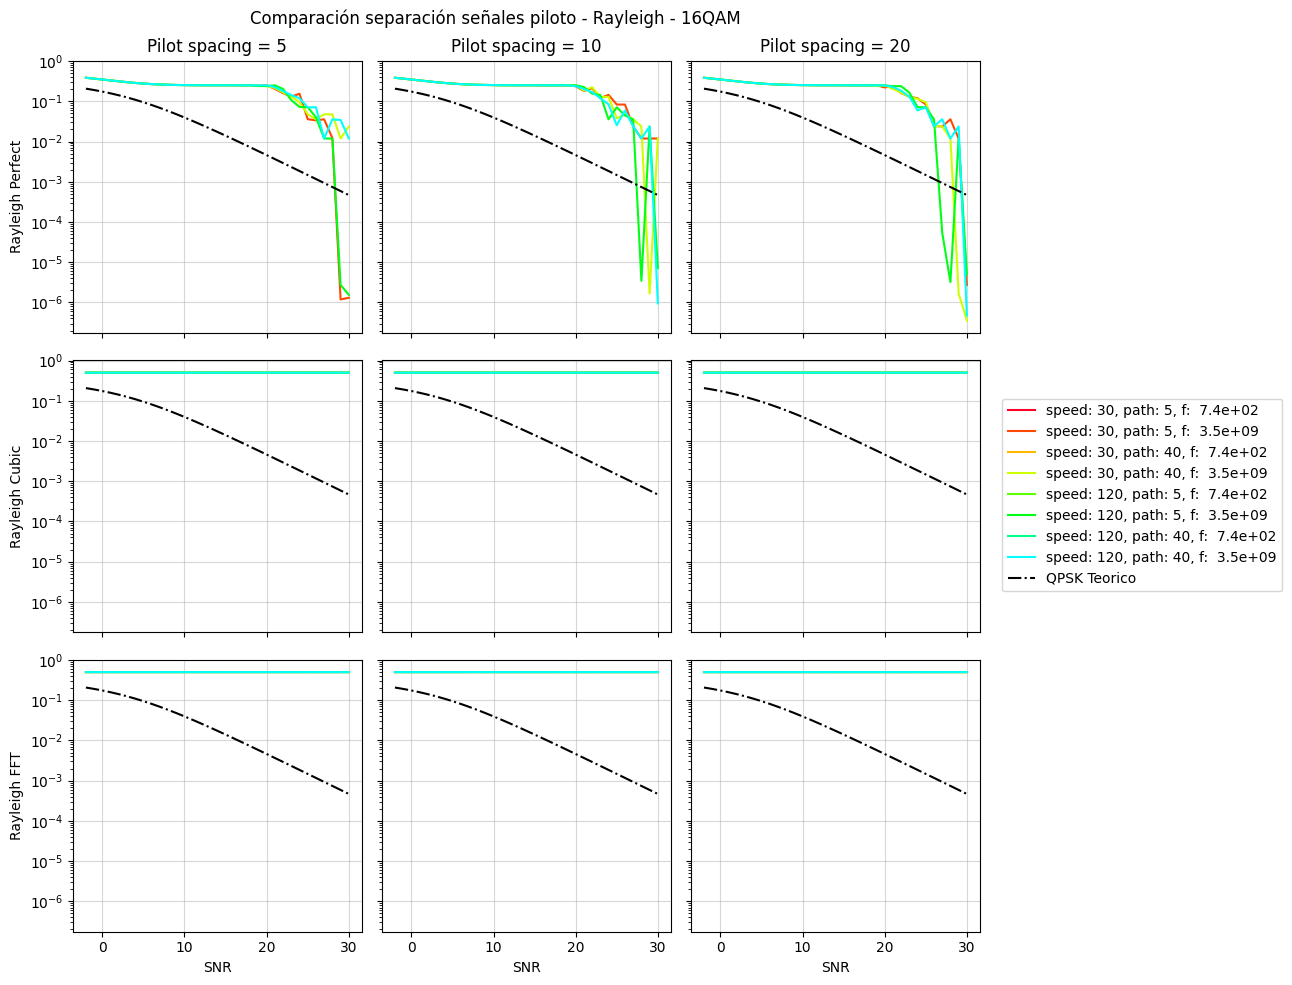

In [125]:
# ps rayleigh
ps_5   = data_16qam[data_16qam['pilot_spacing'] == 5]
ps_10  = data_16qam[data_16qam['pilot_spacing'] == 10]
ps_20  = data_16qam[data_16qam['pilot_spacing'] == 20]

fig, ax = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(10, 10))
for speed in SPEED:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i]
                ps_5_filtered = ps_5[(ps_5['speed'] == speed) & (ps_5['path'] == path) & (ps_5['carrier_freq'] == carrier_freq)]
                ps_10_filtered = ps_10[(ps_10['speed'] == speed) & (ps_10['path'] == path) & (ps_10['carrier_freq'] == carrier_freq)]
                ps_20_filtered = ps_20[(ps_20['speed'] == speed) & (ps_20['path'] == path) & (ps_20['carrier_freq'] == carrier_freq)]
                
                ax[i][0].plot(ps_5_filtered['snr'], ps_5_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(ps_10_filtered['snr'], ps_10_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][2].plot(ps_20_filtered['snr'], ps_20_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qam16_teo = 4/5 * snr

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i])
    for j in range(3):
        ax[i][j].plot(path_5_filtered['snr'], (3/8)*(1-np.sqrt((qam16_teo/(2+qam16_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")
ax[2][2].set_xlabel("SNR")

ax[0][0].set_title("Pilot spacing = 5")
ax[0][1].set_title("Pilot spacing = 10")
ax[0][2].set_title("Pilot spacing = 20")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación separación señales piloto - Rayleigh - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_rayleigh_ps.png', bbox_inches='tight')

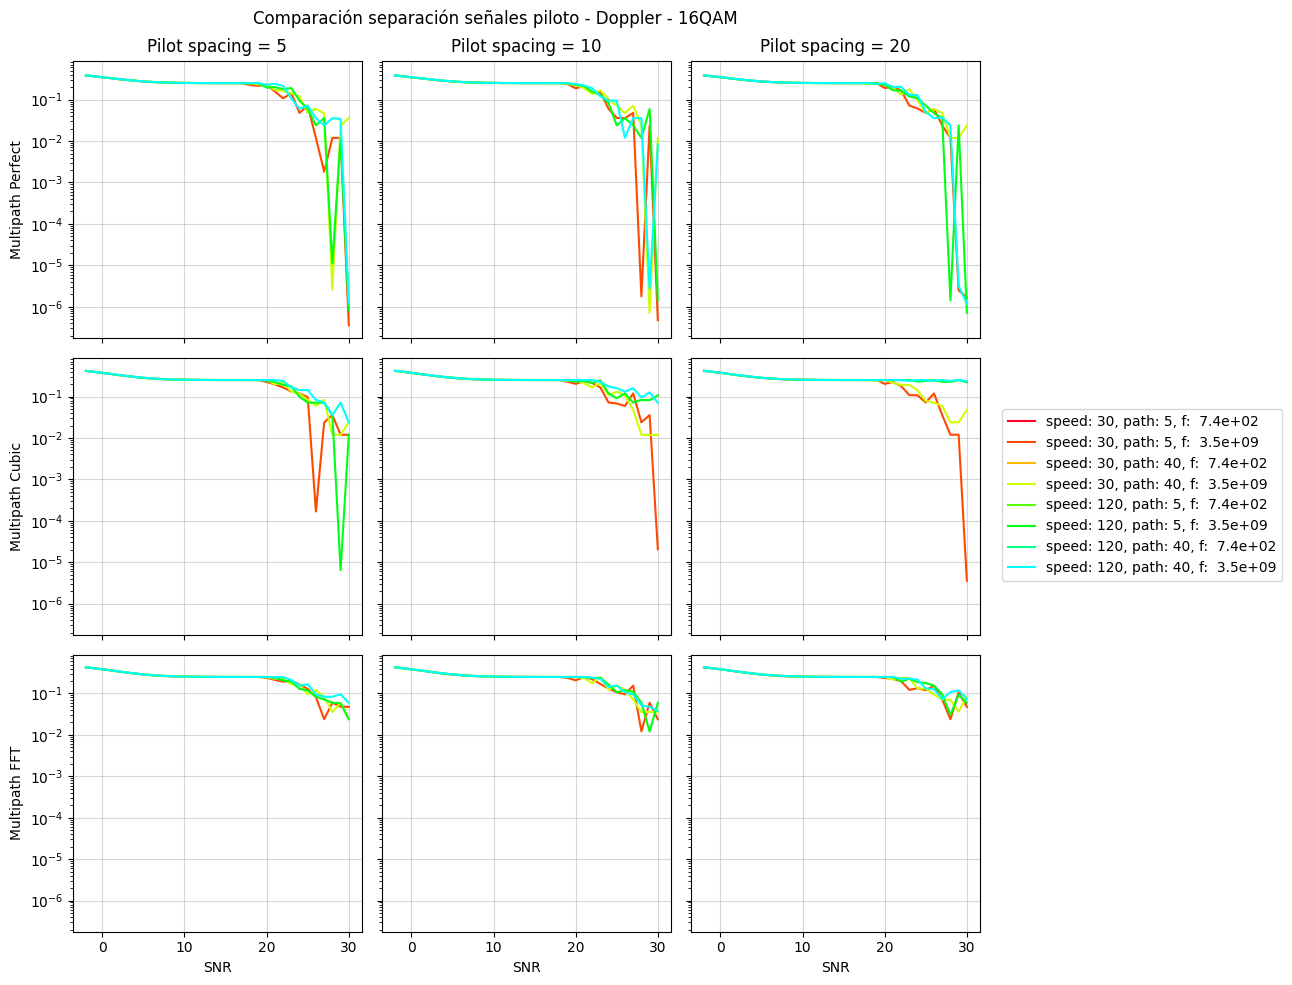

In [126]:
# ps doppler
ps_5   = data_16qam[data_16qam['pilot_spacing'] == 5]
ps_10  = data_16qam[data_16qam['pilot_spacing'] == 10]
ps_20  = data_16qam[data_16qam['pilot_spacing'] == 20]

fig, ax = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(10, 10))
for speed in SPEED:
    for path in PATHS:
        for carrier_freq in CARRIER_FREQ:
            for i in range(0, 3):
                ber = bers_label[i+3]
                ps_5_filtered = ps_5[(ps_5['speed'] == speed) & (ps_5['path'] == path) & (ps_5['carrier_freq'] == carrier_freq)]
                ps_10_filtered = ps_10[(ps_10['speed'] == speed) & (ps_10['path'] == path) & (ps_10['carrier_freq'] == carrier_freq)]
                ps_20_filtered = ps_20[(ps_20['speed'] == speed) & (ps_20['path'] == path) & (ps_20['carrier_freq'] == carrier_freq)]
                
                ax[i][0].plot(ps_5_filtered['snr'], ps_5_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][1].plot(ps_10_filtered['snr'], ps_10_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')
                ax[i][2].plot(ps_20_filtered['snr'], ps_20_filtered[ber], '-', label=f'speed: {speed}, path: {path}, f: {carrier_freq: .2g}')

# plot theorical QPSK
snr = 10**(path_5_filtered['snr']/10)
qpsk_teo = 4 * snr * np.sin(np.pi/8)**2

for i in range(3):
    ax[i][0].set_ylabel(bers_axis[i+3])
    for j in range(3):
        # ax[i][j].plot(path_5_filtered['snr'], (1/2)*(1-np.sqrt((qpsk_teo/(2+qpsk_teo)))), '-.', color='black', label="QPSK Teorico")
        ax[i][j].set_yscale('log')
        ax[i][j].grid(alpha=0.5)



ax[2][0].set_xlabel("SNR")
ax[2][1].set_xlabel("SNR")
ax[2][2].set_xlabel("SNR")

ax[0][0].set_title("Pilot spacing = 5")
ax[0][1].set_title("Pilot spacing = 10")
ax[0][2].set_title("Pilot spacing = 20")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles=handles, bbox_to_anchor=(1, 0.495), loc='center left')

fig.suptitle(f"Comparación separación señales piloto - Doppler - 16QAM")
plt.tight_layout()

fig.savefig('results/16qam_doppler_ps.png', bbox_inches='tight')